<a href="https://colab.research.google.com/github/kaushikabhishek87/Tensorflow_projects/blob/main/08_NLP_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-06-28 07:09:16--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-06-28 07:09:16 (101 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
from helper_functions import unzip_data, compare_historys, plot_loss_curves

In [4]:
#getting data
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2021-06-28 07:09:20--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.139.128, 74.125.141.128, 173.194.210.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.139.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.005s  

2021-06-28 07:09:20 (120 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [5]:
unzip_data("nlp_getting_started.zip")

In [6]:
# Becoming one with data
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
train_df["text"][0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [8]:
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [9]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [10]:
# Class distribution
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [11]:
# Total Sample
len(train_df), len(test_df)

(7613, 3263)

In [12]:
# Visualise some random samples
import random
random_index = random.randint(0, len(train_df)-5)
for row in train_df_shuffled[["text","target"]][random_index:(random_index+5)].itertuples():
  _,text, target = row
  print(f"Target:{target}","(real disaster)" if target >0 else "(not real disaster)")
  print(f"Text:\n {text}\n")
  print("---\n")


Target:1 (real disaster)
Text:
 Drought fuels bush fires in Jamaica - http://t.co/0YMF6TXFcH http://t.co/3i3d2NGeNt - @JamaicaObserver @cnewslive RE https://t.co/jyIEkEo2he

---

Target:1 (real disaster)
Text:
 @TradCatKnight (1) Russia may have played into reason but that link is BS.  Okanowa was bloody and mainline invasion looked like a bloody

---

Target:0 (not real disaster)
Text:
 Anyone else think that Stephen sounds like Andy Dick when he gets excited? The difference being... I actually like Stephen. #MasterChef

---

Target:1 (real disaster)
Text:
 Ûª93 blasts accused Yeda Yakub dies in Karachi of heart attack http://t.co/mfKqyxd8XG #Mumbai

---

Target:1 (real disaster)
Text:
 Really cannot condemn an entire group based on the actions of a few.. A heart-warming unity against terrorism.. http://t.co/HHPvPaEL4n

---



In [13]:
# Split data in traiing & validation dataset
from sklearn.model_selection import train_test_split

train_sentences, val_sentences, train_labels,  val_labels = train_test_split(train_df_shuffled["text"].to_numpy(), 
                                                                             train_df_shuffled["target"].to_numpy(),
                                                                             test_size=0.1,
                                                                             random_state=42
                                                                             )

In [14]:
train_sentences.shape, train_labels.shape, val_sentences.shape, val_labels.shape

((6851,), (6851,), (762,), (762,))

In [15]:
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), array([0, 

In [16]:
# Text Vectorization
import tensorflow as tf 
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# use default text vectorization

text_vectorization = TextVectorization(max_tokens=None,
                                standardize="lower_and_strip_punctuation",
                                split="whitespace",
                                ngrams=None,
                                output_mode="int",
                                output_sequence_length=None, #pad each seqeunce to longest sequence,
                                pad_to_max_tokens = True)


In [17]:
# Find the average number of tokens (words) in the training tweets

print(train_sentences[0].split())
round(sum([len(i.split()) for i in train_sentences ])/len(train_sentences) )

['@mogacola', '@zamtriossu', 'i', 'screamed', 'after', 'hitting', 'tweet']


15

In [18]:
## Set up tex vectorization variables
max_vocab_length = 10000 # max number of words in vocabulary
max_length = 15 # How many words from a tweet should model see

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                   output_mode="int",
                                   output_sequence_length = max_length)


In [19]:
# Fit the text vectorizer
text_vectorizer.adapt(train_sentences)

In [20]:
# Create a sample sentence & tokenize it
sample_sentence = "There's a flood in desert"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [21]:
# Unique words in vocab
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:5], words_in_vocab[-5:]

(10000,
 ['', '[UNK]', 'the', 'a', 'in'],
 ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1'])

In [22]:
# Embeddings using embedding layer
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,
                              output_dim=128,
                              input_length=max_length)
embedding

In [23]:
samp_embed = embedding(text_vectorizer( [sample_sentence]))

In [24]:
sample_sentence, samp_embed[0][0]

("There's a flood in desert", <tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([-3.0857468e-02, -3.7301563e-02, -2.7732540e-02, -1.4273725e-02,
         4.6905402e-02, -2.2306815e-03,  4.1510571e-02, -1.9172741e-02,
         4.9075294e-02,  2.0870138e-02, -4.1261423e-02, -4.7240354e-02,
         2.2529874e-02, -1.7713085e-03, -1.3295580e-02, -2.5927676e-02,
         1.0762811e-03, -2.8139209e-02,  4.4643767e-03, -3.5763182e-02,
        -3.6764979e-02,  2.7274217e-02, -2.9410470e-02,  1.7182771e-02,
        -4.8623443e-02, -1.6771629e-04,  4.1839454e-02, -2.3786187e-02,
         4.2490210e-02,  1.6464744e-02,  4.6128776e-02,  3.1698551e-02,
        -4.5289230e-02, -8.0396645e-03,  1.5124988e-02,  3.3647146e-02,
         3.3599827e-02, -3.2950927e-02,  2.6390363e-02,  1.7039325e-02,
        -2.9718531e-02,  2.3319934e-02, -4.6303153e-02, -4.7263183e-02,
         1.9017007e-02, -3.3853851e-02,  1.7324757e-02, -9.7344518e-03,
         2.2102144e-02,  3.6716890e-02,  1.9884262e-02,  3

In [25]:
### Baseline Model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB 
from sklearn.pipeline import Pipeline 

In [26]:
model_0 = Pipeline([
                    ("tfidf",TfidfVectorizer()),
                    ("clf",MultinomialNB())
])

# Fot Pipeline to training_data
model_0.fit(train_sentences, train_labels)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [27]:
# Evaluate base line Model
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Baseline accuracy = {baseline_score:.2f}")

Baseline accuracy = 0.79


In [28]:
baseline_pred = model_0.predict(val_sentences)
baseline_pred[:10]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0])

In [29]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):

  """
  Calculates Models accuracy, precision, recall & return a dictionary
  """

  # accuracy  = round(accuracy_score(y_true, y_pred),2)
  # precision = round(precision_score(y_true, y_pred),2)
  # f1_score_val = round(f1_score(y_true, y_pred),2)

  model_accuracy = accuracy_score(y_true, y_pred)

  model_precision, model_recall, model_fscore , _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")

  model_results = {"accuracy": round(model_accuracy,2),
                   "precision":round(model_precision,2),
                   "recall":round(model_recall,2),
                   "f1":round(model_fscore,2)}

  return model_results

In [30]:
baseline_results = calculate_results(val_labels, baseline_pred)
baseline_results

{'accuracy': 0.79, 'f1': 0.79, 'precision': 0.81, 'recall': 0.79}

# Model 1: Feed forward neural network

In [31]:
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype=tf.string)
X = text_vectorizer(inputs)
X = embedding(X)
# X = layers.Flatten()(X)
X = layers.GlobalAveragePooling1D()(X)
outputs = layers.Dense(1,activation="sigmoid")(X)

model_1 = tf.keras.Model(inputs, outputs, name="model_1_desnse")

model_1.summary()


Model: "model_1_desnse"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [32]:
model_1.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

model_1_history = model_1.fit(x=train_sentences,
                              y=train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 5s 18ms/step - loss: 0.6124 - accuracy: 0.6908 - val_loss: 0.5370 - val_accuracy: 0.7598
Epoch 2/5
215/215 [==============================] - 4s 17ms/step - loss: 0.4415 - accuracy: 0.8206 - val_loss: 0.4711 - val_accuracy: 0.7835
Epoch 3/5
215/215 [==============================] - 4s 17ms/step - loss: 0.3475 - accuracy: 0.8591 - val_loss: 0.4609 - val_accuracy: 0.7979
Epoch 4/5
215/215 [==============================] - 3s 16ms/step - loss: 0.2850 - accuracy: 0.8885 - val_loss: 0.4644 - val_accuracy: 0.7913
Epoch 5/5
215/215 [==============================] - 3s 16ms/step - loss: 0.2380 - accuracy: 0.9104 - val_loss: 0.4860 - val_accuracy: 0.7913


In [33]:
model_1_pred_probs = model_1.predict(val_sentences)

In [34]:
model_1_pred_probs[0]

array([0.27251524], dtype=float32)

In [35]:
model_1_pred = tf.squeeze(tf.round(model_1_pred_probs))
model_1_pred[0:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [36]:
model_1_results = calculate_results(val_labels, model_1_pred)
model_1_results

{'accuracy': 0.79, 'f1': 0.79, 'precision': 0.8, 'recall': 0.79}

In [37]:
import numpy as np
np.array(list(model_1_results)) > np.array(list(baseline_results))

array([False, False, False, False])

In [38]:
### Get the weight matric of embedding layer , vector of each word/token from vocabulary
embed_weights = model_1.get_layer("embedding").get_weights()[0]

In [39]:
embed_weights.shape # length same as total vocabulary

(10000, 128)

In [40]:
# Visualizing vectors in Tensorflow projector


#####Skipped - public view

### LSTM

In [41]:
import tensorflow as tf
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype=tf.string)
X = text_vectorizer(inputs)
X = embedding(X)
# print(X.shape)
# X = layers.LSTM(64, return_sequences=True)(X)
# print(X.shape)
X = layers.LSTM(64)(X)
# print(X.shape)
# X = layers.Dense(64, activation="relu")(X)
outputs = layers.Dense(1, activation="sigmoid")(X)

model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

In [42]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
lstm (LSTM)                  (None, 64)                49408     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
_________________________________________________________________


In [43]:
model_2.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

history_model_2 = model_2.fit(x = train_sentences, y = train_labels, epochs=5, validation_data = (val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 9s 30ms/step - loss: 0.2266 - accuracy: 0.9143 - val_loss: 0.5568 - val_accuracy: 0.7822
Epoch 2/5
215/215 [==============================] - 6s 28ms/step - loss: 0.1566 - accuracy: 0.9406 - val_loss: 0.5784 - val_accuracy: 0.7808
Epoch 3/5
215/215 [==============================] - 6s 28ms/step - loss: 0.1276 - accuracy: 0.9518 - val_loss: 0.7495 - val_accuracy: 0.7861
Epoch 4/5
215/215 [==============================] - 6s 28ms/step - loss: 0.1072 - accuracy: 0.9593 - val_loss: 0.8943 - val_accuracy: 0.7703
Epoch 5/5
215/215 [==============================] - 6s 29ms/step - loss: 0.0841 - accuracy: 0.9645 - val_loss: 0.9316 - val_accuracy: 0.7717


In [44]:
# Prediction
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10]

array([[6.5853000e-03],
       [8.4542918e-01],
       [9.9982727e-01],
       [1.7587364e-02],
       [3.7896633e-04],
       [9.9950361e-01],
       [4.2169130e-01],
       [9.9990082e-01],
       [9.9979758e-01],
       [6.1776996e-01]], dtype=float32)

In [45]:
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 0., 1., 1., 1.], dtype=float32)>

In [46]:
model_2_results = calculate_results(y_true=val_labels, y_pred=model_2_preds)
model_2_results

{'accuracy': 0.77, 'f1': 0.77, 'precision': 0.78, 'recall': 0.77}

In [114]:
(np.array(list(model_2_results.values()))) > np.array(list(baseline_results.values()))

array([False, False, False, False])

## GRU - Gated Reccurent Unit

In [48]:
inputs = layers.Input(shape=(1,), dtype=tf.string)
X = text_vectorizer(inputs)
X = embedding(X)
# X = layers.GRU(64, activation="tanh", return_sequences=True)(X)
# X = layers.LSTM(64, return_sequences=True)(X)
X = layers.GRU(64)(X)
# X = layers.Dense(64, activation="relu")(X)
# X = layers.GlobalAveragePooling1D()(X)
outputs = layers.Dense(1, activation="sigmoid")(X)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_gru") 
model_3.summary()

Model: "model_3_gru"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
gru (GRU)                    (None, 64)                37248     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_________________________________________________________________


In [49]:
model_3.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

history_model_3 = model_3.fit(train_sentences, train_labels, epochs=5, validation_data = (val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 9s 30ms/step - loss: 0.1544 - accuracy: 0.9399 - val_loss: 0.6640 - val_accuracy: 0.7677
Epoch 2/5
215/215 [==============================] - 6s 27ms/step - loss: 0.0817 - accuracy: 0.9701 - val_loss: 0.8909 - val_accuracy: 0.7782
Epoch 3/5
215/215 [==============================] - 6s 28ms/step - loss: 0.0701 - accuracy: 0.9715 - val_loss: 1.0606 - val_accuracy: 0.7756
Epoch 4/5
215/215 [==============================] - 6s 27ms/step - loss: 0.0566 - accuracy: 0.9755 - val_loss: 0.9426 - val_accuracy: 0.7730
Epoch 5/5
215/215 [==============================] - 6s 28ms/step - loss: 0.0510 - accuracy: 0.9774 - val_loss: 1.4812 - val_accuracy: 0.7677


In [50]:
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10]

array([[2.6654571e-02],
       [8.6993867e-01],
       [9.9996400e-01],
       [6.9242775e-02],
       [2.8882181e-05],
       [9.9992764e-01],
       [9.7883058e-01],
       [9.9997818e-01],
       [9.9995971e-01],
       [9.9805939e-01]], dtype=float32)

In [51]:
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 1., 0., 0.], dtype=float32)>

In [52]:
model_3_results = calculate_results(val_labels, model_3_preds)
model_3_results

{'accuracy': 0.77, 'f1': 0.77, 'precision': 0.77, 'recall': 0.77}

## Bi-Directional RNN

In [59]:
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype = tf.string)
X = text_vectorizer(inputs)
X = embedding(X)
# X = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(X)
X = layers.Bidirectional(layers.GRU(64))(X)
outputs = layers.Dense(1, activation="sigmoid")(X)
model_4 = tf.keras.Model(inputs, outputs, name="model_4")

In [60]:
model_4.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               74496     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 1,354,625
Trainable params: 1,354,625
Non-trainable params: 0
_________________________________________________________________


In [61]:
model_4.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

history_model_4 = model_4.fit(train_sentences, train_labels, epochs=5, validation_data = (val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 12s 40ms/step - loss: 0.1225 - accuracy: 0.9600 - val_loss: 0.8068 - val_accuracy: 0.7730
Epoch 2/5
215/215 [==============================] - 8s 36ms/step - loss: 0.0610 - accuracy: 0.9761 - val_loss: 1.0757 - val_accuracy: 0.7677
Epoch 3/5
215/215 [==============================] - 8s 37ms/step - loss: 0.0505 - accuracy: 0.9774 - val_loss: 1.1611 - val_accuracy: 0.7730
Epoch 4/5
215/215 [==============================] - 8s 35ms/step - loss: 0.0420 - accuracy: 0.9803 - val_loss: 1.0943 - val_accuracy: 0.7730
Epoch 5/5
215/215 [==============================] - 8s 36ms/step - loss: 0.0443 - accuracy: 0.9777 - val_loss: 1.2201 - val_accuracy: 0.7703


In [62]:
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

array([[1.5474528e-02],
       [7.3474324e-01],
       [9.9982035e-01],
       [1.3102213e-01],
       [2.4066947e-05],
       [9.9920738e-01],
       [8.0813903e-01],
       [9.9998897e-01],
       [9.9994290e-01],
       [9.5688224e-01]], dtype=float32)

In [64]:
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [65]:
model_4_results = calculate_results(val_labels, model_4_preds)
model_4_results

{'accuracy': 0.77, 'f1': 0.77, 'precision': 0.77, 'recall': 0.77}

## 1D Convolutional Neural Network

In [77]:
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype=tf.string)
X = text_vectorizer(inputs)
X = embedding(X)
X = layers.Conv1D(filters=64, kernel_size=5, strides=1, activation="relu", padding="valid")(X)
X = layers.GlobalMaxPool1D()(X)
outputs = layers.Dense(1, activation="sigmoid")(X)

model_5 = tf.keras.Model(inputs, outputs, name = "model_5")

model_5.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 11, 64)            41024     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 1,321,089
Trainable params: 1,321,089
Non-trainable params: 0
_________________________________________________

In [78]:
model_5.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

history_model_5 = model_5.fit(train_sentences, train_labels, epochs=5, validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 5s 21ms/step - loss: 0.0774 - accuracy: 0.9783 - val_loss: 1.1154 - val_accuracy: 0.7480
Epoch 2/5
215/215 [==============================] - 4s 20ms/step - loss: 0.0481 - accuracy: 0.9804 - val_loss: 1.2284 - val_accuracy: 0.7480
Epoch 3/5
215/215 [==============================] - 4s 20ms/step - loss: 0.0445 - accuracy: 0.9809 - val_loss: 1.1962 - val_accuracy: 0.7507
Epoch 4/5
215/215 [==============================] - 5s 21ms/step - loss: 0.0430 - accuracy: 0.9807 - val_loss: 1.2931 - val_accuracy: 0.7480
Epoch 5/5
215/215 [==============================] - 4s 21ms/step - loss: 0.0425 - accuracy: 0.9799 - val_loss: 1.3158 - val_accuracy: 0.7546


In [86]:
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

array([[7.5367033e-01],
       [9.4796312e-01],
       [9.9996901e-01],
       [3.9752573e-02],
       [5.0249231e-08],
       [9.9543464e-01],
       [9.7459328e-01],
       [9.9998999e-01],
       [1.0000000e+00],
       [9.9013764e-01]], dtype=float32)

In [87]:
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([1., 1., 1., 0., 0.], dtype=float32)>

In [88]:
model_5_results = calculate_results(val_labels, model_5_preds)
model_5_results 

{'accuracy': 0.75, 'f1': 0.75, 'precision': 0.75, 'recall': 0.75}

## Model 6 : Tensorflow Hub Pretrained Sentence Encoder

In [90]:
import tensorflow_hub as hub 
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [93]:
embed_samples[0].shape

TensorShape([512])

In [91]:
embed_samples = embed([sample_sentence])
print(embed_samples[0][0:50])

tf.Tensor(
[-0.03918234  0.00964771  0.04330787 -0.03425474  0.04044541  0.022034
  0.06457665  0.05395906 -0.00645233 -0.0040193   0.00374234  0.03399842
 -0.0001142   0.03466038  0.07106083 -0.04737619  0.01955563  0.04163401
 -0.01249781 -0.04233589 -0.03306966  0.03382533  0.04126192  0.05407469
  0.06432928 -0.06034325  0.02075243 -0.02950704 -0.01111731 -0.05624956
 -0.03747579 -0.00436223 -0.05266851 -0.01103335 -0.03791904 -0.02382589
  0.01105018  0.0494301   0.03233043 -0.06248476  0.00571993 -0.02107519
 -0.07163376  0.05579812 -0.08994923 -0.01900215  0.03486373  0.00160859
 -0.03825596  0.06149543], shape=(50,), dtype=float32)


In [94]:
# Model
senetnce_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4", 
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name="USE") # Input can be variable length as given in the documentation of this particular model on tensorflow


In [115]:
model_6 = tf.keras.Sequential([
   senetnce_encoder_layer,
   layers.Dense(128, activation="relu"),
   layers.Dense(1, activation="sigmoid",name="output_layer")                                
],  name = "model_6")

model_6.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])
model_6.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 512)               256797824 
_________________________________________________________________
dense_14 (Dense)             (None, 128)               65664     
_________________________________________________________________
output_layer (Dense)         (None, 1)                 129       
Total params: 256,863,617
Trainable params: 65,793
Non-trainable params: 256,797,824
_________________________________________________________________


In [116]:
history_model_6 = model_6.fit(train_sentences, train_labels, epochs=5, validation_data = (val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 4s 14ms/step - loss: 0.4878 - accuracy: 0.7881 - val_loss: 0.4543 - val_accuracy: 0.8018
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4105 - accuracy: 0.8190 - val_loss: 0.4392 - val_accuracy: 0.8123
Epoch 3/5
215/215 [==============================] - 2s 12ms/step - loss: 0.3960 - accuracy: 0.8251 - val_loss: 0.4317 - val_accuracy: 0.8097
Epoch 4/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3871 - accuracy: 0.8294 - val_loss: 0.4318 - val_accuracy: 0.8163
Epoch 5/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3773 - accuracy: 0.8330 - val_loss: 0.4260 - val_accuracy: 0.8202


In [117]:
model_6_pred_probs = model_6.predict(val_sentences)

In [118]:
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))

In [119]:
model_6_results = calculate_results(val_labels, model_6_preds)
model_6_results

{'accuracy': 0.82, 'f1': 0.82, 'precision': 0.82, 'recall': 0.82}

In [120]:
np.array(list(model_6_results.values())) > np.array(list(baseline_results.values()))

array([ True,  True,  True,  True])

## Model 7 : TF HUB Pretrained with 10% of data

In [124]:
# Subset of 10% of subset data
train_10_percent = train_df_shuffled[["text","target"]].sample(frac=0.1, random_state=42)
train_sentences_10_percent = train_10_percent["text"].to_list()
train_labels_10_percent = train_10_percent["target"].to_list()

In [125]:
len(train_sentences_10_percent), len(train_labels_10_percent)

(761, 761)

In [127]:
np.bincount(train_labels_10_percent)

array([413, 348])

In [129]:
# CLoning Model 6
model_7 = tf.keras.models.clone_model(model_6)

# Compile Model
model_7.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

history_model_7 = model_7.fit(x=train_sentences_10_percent, y=train_labels_10_percent, epochs=5, validation_data = (val_sentences, val_labels))

Epoch 1/5
24/24 [==============================] - 4s 41ms/step - loss: 0.6568 - accuracy: 0.7319 - val_loss: 0.6028 - val_accuracy: 0.8005
Epoch 2/5
24/24 [==============================] - 1s 22ms/step - loss: 0.5585 - accuracy: 0.7911 - val_loss: 0.5016 - val_accuracy: 0.8005
Epoch 3/5
24/24 [==============================] - 0s 21ms/step - loss: 0.4754 - accuracy: 0.7950 - val_loss: 0.4376 - val_accuracy: 0.8163
Epoch 4/5
24/24 [==============================] - 1s 21ms/step - loss: 0.4260 - accuracy: 0.8173 - val_loss: 0.4004 - val_accuracy: 0.8333
Epoch 5/5
24/24 [==============================] - 1s 22ms/step - loss: 0.3971 - accuracy: 0.8239 - val_loss: 0.3727 - val_accuracy: 0.8465


In [131]:
model_7_pred_probs = model_7.predict(val_sentences)

model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))

model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [132]:
model_7_results = calculate_results(val_labels, model_7_preds)
model_7_results

{'accuracy': 0.85, 'f1': 0.85, 'precision': 0.85, 'recall': 0.85}

In [133]:
np.array(list(model_7_results.values())) > np.array(list(baseline_results.values()))

array([ True,  True,  True,  True])

## Fixing Data Leakage in Model 7 - as creating 10% data, accidentally validation data got feed into training 

In [140]:
## using train_sentences for getting 10% & avoid data leakage
train_10_percent_split = int(0.1* len(train_sentences))
print(train_10_percent_split)
train_senetnces_10_percent = train_sentences[:train_10_percent_split]
len(train_10_percent)

685


685

In [137]:
train_labels_10_percent = train_labels[:train_10_percent_split]
len(train_labels_10_percent)

685

In [138]:
np.bincount(train_labels_10_percent)

array([406, 279])

In [141]:
# CLoning Model 6
model_7 = tf.keras.models.clone_model(model_6)

# Compile Model
model_7.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

history_model_7 = model_7.fit(x=train_senetnces_10_percent, y=train_labels_10_percent, epochs=5, validation_data = (val_sentences, val_labels))

Epoch 1/5
22/22 [==============================] - 3s 38ms/step - loss: 0.6601 - accuracy: 0.6569 - val_loss: 0.6321 - val_accuracy: 0.7218
Epoch 2/5
22/22 [==============================] - 0s 19ms/step - loss: 0.5664 - accuracy: 0.8044 - val_loss: 0.5611 - val_accuracy: 0.7638
Epoch 3/5
22/22 [==============================] - 0s 20ms/step - loss: 0.4790 - accuracy: 0.8336 - val_loss: 0.5072 - val_accuracy: 0.7808
Epoch 4/5
22/22 [==============================] - 0s 20ms/step - loss: 0.4207 - accuracy: 0.8365 - val_loss: 0.4875 - val_accuracy: 0.7808
Epoch 5/5
22/22 [==============================] - 0s 20ms/step - loss: 0.3853 - accuracy: 0.8423 - val_loss: 0.4860 - val_accuracy: 0.7861


In [142]:
model_7_pred_probs = model_7.predict(val_sentences)

model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))

model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [143]:
model_7_results = calculate_results(val_labels, model_7_preds)
model_7_results

{'accuracy': 0.79, 'f1': 0.78, 'precision': 0.79, 'recall': 0.79}

In [144]:
np.array(list(model_7_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

## Comparing models performances

In [147]:
import pandas as pd
combined_results = pd.DataFrame({"0_bseline":baseline_results,
                                "1_simple_dense":model_1_results,
                                "2_lstm":model_2_results,
                                "3_gru":model_3_results,
                                "4_bidirectional":model_4_results,
                                "5_conv1d":model_5_results,
                                "6_tf_hub_use_encoder":model_6_results,
                                "7_tf_hub_use_encoder_10_percent":model_7_results})
combined_results.head()

,0_bseline,1_simple_dense,2_lstm,3_gru,4_bidirectional,5_conv1d,6_tf_hub_use_encoder,7_tf_hub_use_encoder_10_percent
accuracy,0.79,0.79,0.77,0.77,0.77,0.75,0.82,0.79
precision,0.81,0.80,0.78,0.77,0.77,0.75,0.82,0.79
recall,0.79,0.79,0.77,0.77,0.77,0.75,0.82,0.79
f1,0.79,0.79,0.77,0.77,0.77,0.75,0.82,0.78


In [148]:
combined_results.transpose()

,accuracy,precision,recall,f1
0_bseline,0.79,0.81,0.79,0.79
1_simple_dense,0.79,0.80,0.79,0.79
2_lstm,0.77,0.78,0.77,0.77
3_gru,0.77,0.77,0.77,0.77
4_bidirectional,0.77,0.77,0.77,0.77
5_conv1d,0.75,0.75,0.75,0.75
6_tf_hub_use_encoder,0.82,0.82,0.82,0.82
7_tf_hub_use_encoder_10_percent,0.79,0.79,0.79,0.78


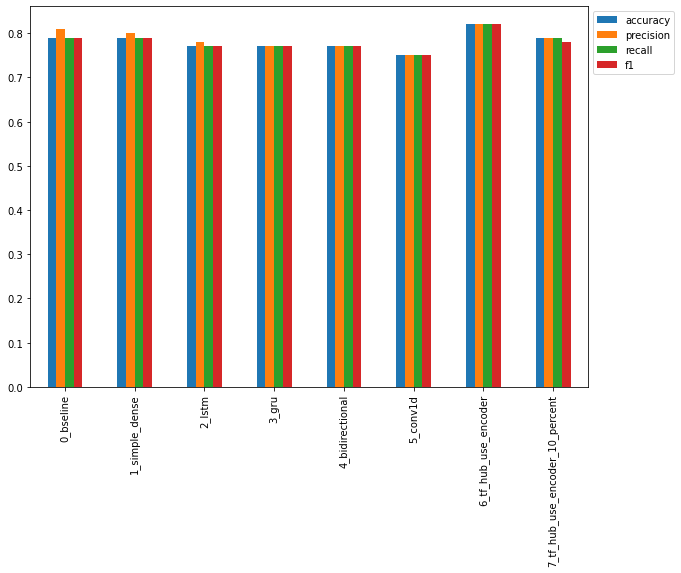

In [152]:
combined_results.transpose().plot(kind="bar", figsize=(10,7)).legend(bbox_to_anchor=(1.0,1.0))

# Loading Saved model with HUB

In [153]:
# Bit different since we are using Model from HUB
model_6.save("model_6.h5")

In [154]:
loaded_model = tf.keras.models.load_model("model_6.h5",
                                          custom_objects={"KerasLayer":hub.KerasLayer})

In [155]:
model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 11ms/step - loss: 0.4260 - accuracy: 0.8202


[0.42602455615997314, 0.8202099800109863]

In [156]:
# Saving with save model format
model_6.save("Model_6_saveformat_model")

INFO:tensorflow:Assets written to: Model_6_saveformat_model/assets


INFO:tensorflow:Assets written to: Model_6_saveformat_model/assets


In [157]:
model_6 = tf.keras.models.load_model("Model_6_saveformat_model")
model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 11ms/step - loss: 0.4260 - accuracy: 0.8202


[0.42602455615997314, 0.8202099800109863]

# Examples where trained model is most wrong

In [158]:
!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip

--2021-06-28 09:57:15--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.98.128, 173.194.218.128, 64.233.170.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.98.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M   115MB/s    in 9.2s    

2021-06-28 09:57:24 (99.5 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]



In [159]:
unzip_data("08_model_6_USE_feature_extractor.zip")

In [161]:
# importing previously trained model
model_6_pretrained = tf.keras.models.load_model("08_model_6_USE_feature_extractor")
model_6_pretrained.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 10ms/step - loss: 0.4272 - accuracy: 0.8163


[0.42723122239112854, 0.8162729740142822]

In [165]:

model_6_pretrained_pred_probs = model_6_pretrained.predict(val_sentences)
model_6_pretrained_preds = tf.squeeze(tf.round(model_6_pretrained_pred_probs))
model_6_pretrained_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [166]:
val_df = pd.DataFrame({"text":val_sentences,
                       "target":val_labels,
                       "pred":model_6_pretrained_preds,
                       "pred_probs":tf.squeeze(model_6_pretrained_pred_probs)})

In [167]:
val_df.head()

,text,target,pred,pred_probs
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.159757
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.747162
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988749
3,@camilacabello97 Internally and externally scr...,1,0.0,0.196229
4,Radiation emergency #preparedness starts with ...,1,1.0,0.707808


In [169]:
most_wrong = val_df[val_df["target"]!=val_df["pred"]].sort_values("pred_probs", ascending=False)
most_wrong.head()

,text,target,pred,pred_probs
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.910196
759,FedEx will no longer transport bioterror patho...,0,1.0,0.876982
628,@noah_anyname That's where the concentration c...,0,1.0,0.852300
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.835454
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.827213


In [170]:
most_wrong.tail(5)

,text,target,pred,pred_probs
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.043918
233,I get to smoke my shit in peace,1,0.0,0.042087
38,Why are you deluged with low self-image? Take ...,1,0.0,0.038998
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.038949
23,Ron &amp; Fez - Dave's High School Crush https...,1,0.0,0.037186


In [173]:
## False positive
for row in most_wrong[:10].itertuples():
  _, text, target, pred, pred_probs = row
  print(f"Target: {target}, pred: {pred}, Probability : {pred_probs}")
  print(f"Text:\n{text}\n")
  print("----in")

Target: 0, pred: 1.0, Probability : 0.9101957082748413
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

----in
Target: 0, pred: 1.0, Probability : 0.8769820928573608
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----in
Target: 0, pred: 1.0, Probability : 0.8523001670837402
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

----in
Target: 0, pred: 1.0, Probability : 0.8354544639587402
Text:
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

----in
Target: 0, pred: 1.0, Probability : 0.8272132873535156
Text:
@AshGhebranious civil rights continued in the 60s. And what about trans-generational trauma? if anything we should listen to the Americans.

----in
Target: 0, pred: 1.0, Probability : 0.814815878868103
Text:
@SonofLiberty357 all illuminated by the 

In [174]:
## False negative
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, pred_probs = row
  print(f"Target: {target}, pred: {pred}, Probability : {pred_probs}")
  print(f"Text:\n{text}\n")
  print("----in")

Target: 1, pred: 0.0, Probability : 0.06730341911315918
Text:
@DavidVonderhaar At least you were sincere ??

----in
Target: 1, pred: 0.0, Probability : 0.05507585406303406
Text:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

----in
Target: 1, pred: 0.0, Probability : 0.054603397846221924
Text:
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

----in
Target: 1, pred: 0.0, Probability : 0.05459702014923096
Text:
going to redo my nails and watch behind the scenes of desolation of smaug ayyy

----in
Target: 1, pred: 0.0, Probability : 0.04963722825050354
Text:
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

----in
Target: 1, pred: 0.0, Probability : 0.043918460607528687
Text:
@SoonerMagic_ I mean I'm a fan but I don't need a girl sounding off li

In [177]:
# 